<a href="https://colab.research.google.com/github/anaiy2004/African-American-Police-Killings-Classifier/blob/master/PoliceKillingsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Download and Pre-Processing from [Mapping Police Violence]("https://static1.squarespace.com/static/54ecf211e4b0ed744420c5b6/t/5f04cebda843400a2e8bacd4/1594150600757/MPVDatasetDownload.xlsx")





In [ ]:
#importing useful libraries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import psycopg2 as ps

In [ ]:
#url of download (if this does not work, just download it locally on your computer from mappingpoliceviolence.com, hit ctrl j in chrome, and compy and paste the url of the download)
url = "https://static1.squarespace.com/static/54ecf211e4b0ed744420c5b6/t/608f7f8327be7c76060fa19f/1620017033853/MPVDatasetDownload.xlsx"

In [ ]:
#creates a dataframe by reading in url with columns = column_names
column_names = ["Victims name" ,  "VictimsAge" , "VictimsGender" , "VictimsRace", "URLofimage" , "Date of Incident", "Street" , "City" , "State" , "Zipcode" , "County" , "Agency", "ORI Identifier", "CauseOfDeath" , "description" , "disposition" , "CriminalCharges" , "link" , "MentalIllness" , "Armed" , "AllegedWeapon" , "AllegedThreatLevel" , "Fleeing" , "BodyCam", "WaPO ID"  , "Offduty" , "Geo" , "ID", "FatalEncountersId", "order", "Encounter Type", "reason for encounter", "namesOfficer", "raceOfficer", "past", "service"]
df  = pd.read_excel(url, "2013-2020 Police Killings", header=None, names = column_names)
df = df.iloc[1:]
df.tail(2)

,Victims name,VictimsAge,VictimsGender,VictimsRace,URLofimage,Date of Incident,Street,City,State,Zipcode,County,Agency,ORI Identifier,CauseOfDeath,description,disposition,CriminalCharges,link,MentalIllness,Armed,AllegedWeapon,AllegedThreatLevel,Fleeing,BodyCam,WaPO ID,Offduty,Geo,ID,FatalEncountersId,order,Encounter Type,reason for encounter,namesOfficer,raceOfficer,past,service
9115,Mark Chavez,49,Male,Hispanic,http://www.tricitytribuneusa.com/wp-content/up...,2013-01-01 00:00:00,912 Loma Linda Ave.,Farmington,NM,87401,San Juan,Farmington Police Department,NM0240200,Gunshot,An officer responded to a report by Chavez tha...,Unreported,No known charges,http://www.daily-times.com/farmington-news/ci_...,No,Allegedly Armed,blunt weapon,NaN,NaN,NaN,NaN,NaN,Urban,1,12175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9116,Tyree Bell,31,Male,Black,http://content.omaha.com/media/maps/ps/2013/ja...,2013-01-01 00:00:00,3727 N. 42nd St.,Omaha,NE,68111,Douglas,Omaha Police Department,NB0280200,Gunshot,Omaha Police Department responded to a 911 dom...,Grand jury/No bill or Cleared,No known charges,http://www.ketv.com/news/Police-chief-details-...,Yes,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Urban,2,12173,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#deleting unnecesary information
df = df.drop(columns=['City','Encounter Type','VictimsAge', 'reason for encounter','Offduty', 'Victims name' , 'Zipcode','ORI Identifier', 'URLofimage', 'County' , "order", "namesOfficer", "description","raceOfficer", "past","service", 'Street', 'Date of Incident' , "Offduty",  'Geo', 'Agency'  , 'link' , 'WaPO ID' , 'ID', 'FatalEncountersId' ])
df = df.dropna()
df.head()


,VictimsGender,VictimsRace,State,CauseOfDeath,disposition,CriminalCharges,MentalIllness,Armed,AllegedWeapon,AllegedThreatLevel,Fleeing,BodyCam
1,Male,White,CA,Gunshot,Pending investigation,No known charges,Yes,Unarmed/Did Not Have Actual Weapon,no object,other,not fleeing,yes
2,Male,Unknown Race,TN,Gunshot,Pending investigation,No known charges,No,Allegedly Armed,knife,other,not fleeing,yes
4,Male,Unknown Race,MT,Gunshot,Pending investigation,No known charges,No,Allegedly Armed,gun,attack,other,no
6,Male,Unknown Race,AZ,Gunshot,Pending investigation,No known charges,No,Allegedly Armed,gun,other,not fleeing,no
7,Male,Unknown Race,MA,Gunshot,Pending investigation,No known charges,No,Allegedly Armed,gun,other,not fleeing,no


In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#creates a one-hot encoder function which returns a column of our dataframe one-hot encodeded as well as their categorical name (given input of the column) 

def one_hot_encode(data):
  values = array(data)
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(values)
  onehot_encoder = OneHotEncoder(sparse=False)
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
  shape = onehot_encoded.shape
  inverted = []
  for i in range(shape[-1]):
      inverted.append(label_encoder.inverse_transform([i]))
  return onehot_encoded, inverted



In [ ]:
# declares output array
outputs = [[] for i in range(len(df))] 

In [ ]:
#creates inputs [1,0] = African American Killing by Police, [0,1] = non African American Killing by Police
races = df["VictimsRace"] 
count = 0
for race in races:
  if(race == "Black"):
    outputs[count].append(1)
    outputs[count].append(0)
  else:
    outputs[count].append(0)
    outputs[count].append(1)
  count += 1
df = df.drop(columns = "VictimsRace")

In [ ]:
xOutputs = []
for race in races:
  if(race == "Black"):
    xOutputs.append(1)
  else:
    xOutputs.append(0)

In [ ]:
len(xOutputs)

5603

In [ ]:
# creates inputs by one-hot encoding individual dataframe columns
# inverted is a list of categorical data which corresponds to each "1" in the one-hot encoding
inputs = list()
inverted = []
for column in df: 
  check = array(df[column])
  encodedArray = one_hot_encode(check)[0]
  inverted.extend(one_hot_encode(check)[1])
  inputs.append(encodedArray)
inputs = np.hstack(inputs)


In [ ]:
# code for undersampling
#import random
#temp = list(zip(inputs, outputs)) 
#random.shuffle(temp) 
#inputs, outputs = zip(*temp)

In [ ]:
#count = 0
#countx = 0
#for i in range(len(outputs)):
#  if(outputs[i][0] == 1):
#    count += 1
#  if(outputs[i][0] == 0):
#    countx += 1
#check = 0
#newInputs = []
#newOutputs = []
#inputs = list(inputs)
#outputs = list(outputs)
#for i in range(len(inputs) - 1):
#  if(check < abs(count-countx)):
#    if(outputs[i][1] == 0):
#      newInputs.append(inputs[i])
#      newOutputs.append(outputs[i])
#    else:
#      check += 1
#  else:
#    newInputs.append(inputs[i])
#    newOutputs.append(outputs[i])

In [ ]:
#import random
#temp = list(zip(newInputs, newOutputs)) 
#random.shuffle(temp) 
#newInputs, newOutputs = zip(*temp)

In [ ]:
len(inputs)


5603

In [ ]:
len(xOutputs)

5603

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
oversample = RandomOverSampler(sampling_strategy='minority')
newInputs, newOutputs = oversample.fit_resample(inputs, xOutputs)
# summarize class distribution
print(Counter(newOutputs))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Counter({0: 4210, 1: 4210})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import random
temp = list(zip(newInputs, newOutputs)) 
random.shuffle(temp) 
newInputs, newOutputs = zip(*temp)

In [ ]:
# creates a train/test split of 80-20
newOutputs = np.array(newOutputs)
split = int(0.7*len(newInputs))
X_train, X_test, y_train, y_test = newInputs[:split], newInputs[split:], newOutputs[:split], newOutputs[split:]
X_train = np.expand_dims(X_train, axis = 2)
X_test = np.expand_dims(X_test, axis = 2)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LSTM, Flatten, Conv1D
#earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights= True)
model = Sequential()
model.add(Flatten())
model.add(Dense(2000, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(200, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(1, activation = 'relu'))
model.compile(loss = "MSE", optimizer = "Adam", metrics=["accuracy"])


In [ ]:
# fits the model to the training data
# it is extremely important to use class_weights as otherwise, the model only predicts one class (as 68% of the inputs are non-African American Killings)
# this ensures that our model is fair and treats the individual accuracy of each class' classification the same
model.fit(X_train, y_train,
            batch_size=16,
            epochs= 20,
            validation_split = 0.2, 
            )

Epoch 1/20
295/295 [==============================] - 4s 11ms/step - loss: 0.2594 - accuracy: 0.5921 - val_loss: 0.2038 - val_accuracy: 0.6879
Epoch 2/20
295/295 [==============================] - 3s 10ms/step - loss: 0.2046 - accuracy: 0.6857 - val_loss: 0.2167 - val_accuracy: 0.6446
Epoch 3/20
295/295 [==============================] - 3s 10ms/step - loss: 0.1938 - accuracy: 0.7115 - val_loss: 0.1880 - val_accuracy: 0.7226
Epoch 4/20
295/295 [==============================] - 3s 9ms/step - loss: 0.1864 - accuracy: 0.7146 - val_loss: 0.2130 - val_accuracy: 0.6489
Epoch 5/20
295/295 [==============================] - 3s 10ms/step - loss: 0.1729 - accuracy: 0.7492 - val_loss: 0.1844 - val_accuracy: 0.7125
Epoch 6/20
295/295 [==============================] - 3s 10ms/step - loss: 0.1576 - accuracy: 0.7719 - val_loss: 0.1777 - val_accuracy: 0.7337
Epoch 7/20
295/295 [==============================] - 3s 10ms/step - loss: 0.1508 - accuracy: 0.7805 - val_loss: 0.1799 - val_accuracy: 0.7354


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 328)               0         
_________________________________________________________________
dense (Dense)                (None, 2000)              658000    
_________________________________________________________________
dropout (Dropout)            (None, 2000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               400200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 1,058,401
Trainable params: 1,058,401
Non-trainable params: 0
______________________________________________

In [ ]:
from sklearn.metrics import f1_score
preds = model.predict(X_test)
check = 0
num_correct = 0
for i in range(len(preds)):
  if(preds[i] < 0.5):
    preds[i] = 0
  else:
    preds[i] = 1      
for i in range(len(preds)):
  if(preds[i].round() == y_test[i]):
    num_correct += 1
print("The fraction of correctly classified examples in the test set is: " + str(num_correct / len(preds)))
f1_score(y_test, preds, average = None)

The fraction of correctly classified examples in the test set is: 0.7640538400633412


array([0.7399651 , 0.78405797])

In [ ]:
# creates a train/test split of 80-20
newOutputs = np.array(newOutputs)
split = int(0.8*len(newInputs))
X_train, X_test, y_train, y_test = newInputs[:split], newInputs[split:], newOutputs[:split], newOutputs[split:]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.metrics import f1_score
model = tree.DecisionTreeClassifier(max_depth= 5000)
model.fit(X_train, y_train)
preds = model.predict(X_test)
check = 0
num_correct = 0
for i in range(len(preds)):
  if(preds[i] < 0.5):
    preds[i] = 0
  else:
    preds[i] == 1
for i in range(len(preds)):
  if(preds[i].round() == y_test[i]):
    num_correct += 1
print("The fraction of correctly classified examples in the test set is: " + str(num_correct / len(preds)))
f1_score(y_test, preds, average = None)

The fraction of correctly classified examples in the test set is: 0.7802850356294537


array([0.75880052, 0.79825518])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
model = RandomForestClassifier(300)
model.fit(X_train, y_train)
preds = model.predict(X_test)
check = 0
num_correct = 0
for i in range(len(preds)):
  if(preds[i] < 0.5):
    preds[i] = 0
  else:
    preds[i] == 1
for i in range(len(preds)):
  if(preds[i].round() == y_test[i]):
    num_correct += 1
print("The fraction of correctly classified examples in the test set is: " + str(num_correct / len(preds)))
f1_score(y_test, preds, average = None)

The fraction of correctly classified examples in the test set is: 0.8117577197149644


array([0.79614148, 0.82515168])

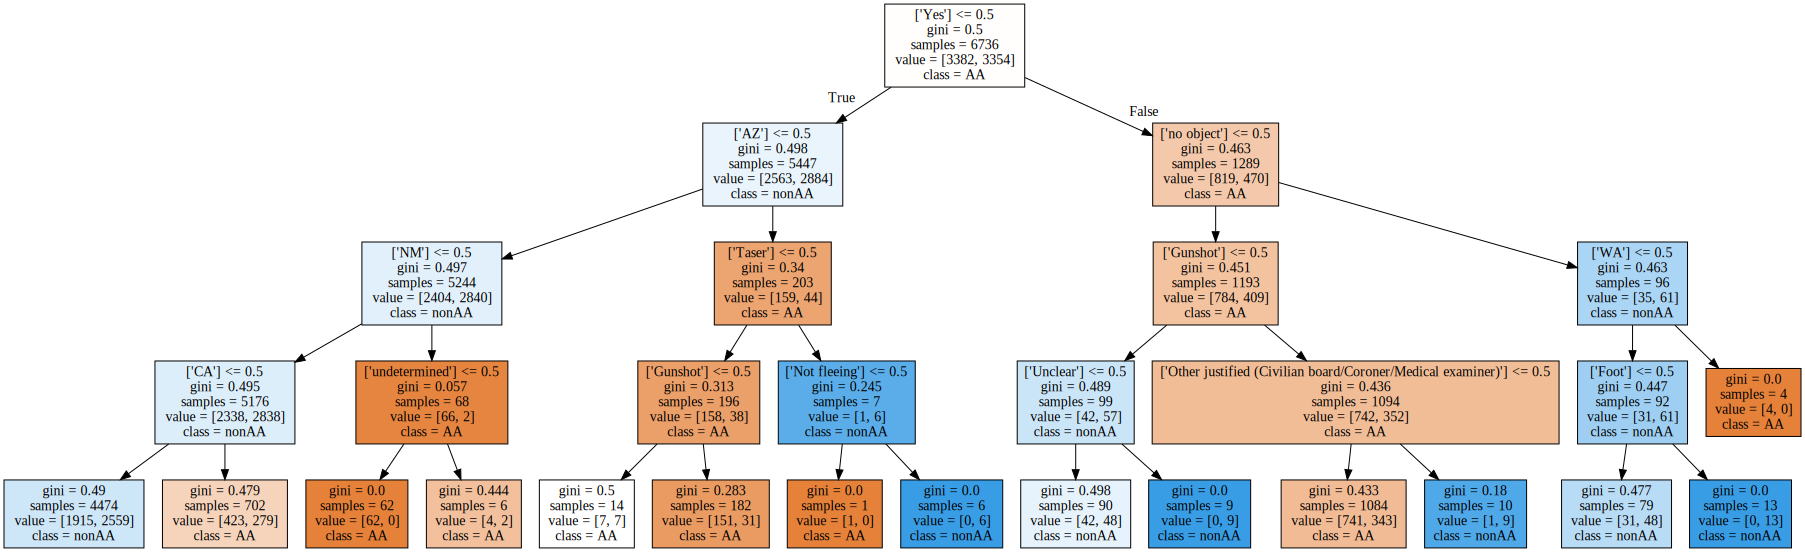

In [ ]:
import graphviz
model = tree.DecisionTreeClassifier(max_depth= 4)
model.fit(X_train, y_train)
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=inverted,  
                                class_names= ["AA", "nonAA"],
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
from sklearn.metrics import accuracy_score
accuracies = []
medAccuracies = []
depths = []
for i in range(5,500, 5):
  print(i)
  depths.append(i)
  model = RandomForestClassifier(300, max_depth=i)
  model.fit(X_train, y_train)
  estimatorAccuracy=[]
  for curEstimator in range(300):
    estimatorAccuracy.append([curEstimator,accuracy_score(y_test, model.estimators_[curEstimator].predict(X_test))])

  estimatorAccuracy=pd.DataFrame(estimatorAccuracy,columns=['estimatorNumber','Accuracy'])
  estimatorAccuracy.sort_values(inplace=True,by='Accuracy',ascending=False)
  estimatorAccuracy = estimatorAccuracy.reset_index(drop=True)

  bestAccuracy= estimatorAccuracy['Accuracy'][0]
  accuracies.append(bestAccuracy)
  medAccuracies.append(estimatorAccuracy['Accuracy'][(len(estimatorAccuracy)/2) + 1])


estimatorAccuracy.head()

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495


,estimatorNumber,Accuracy
0,235,0.765439
1,220,0.763658
2,109,0.760095
3,244,0.758907
4,243,0.758907


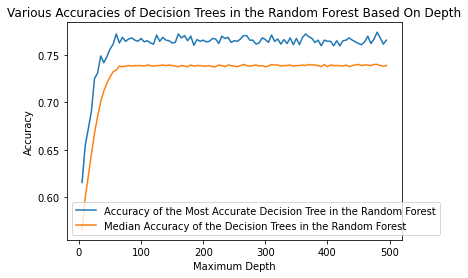

In [ ]:
plt.title("Various Accuracies of Decision Trees in the Random Forest Based On Depth")
plt.plot(depths, accuracies, label = "Accuracy of the Most Accurate Decision Tree in the Random Forest")
plt.plot(depths, medAccuracies, label = "Median Accuracy of the Decision Trees in the Random Forest")

plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.legend()

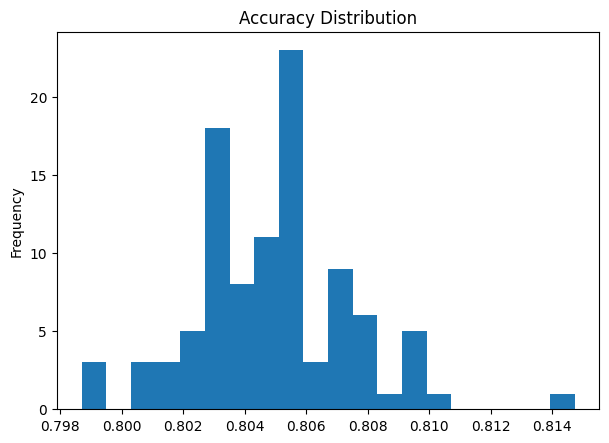

In [ ]:
import matplotlib.pyplot as plt # has a different graph nearly every time, but the range of accuracies is always similar, which is what the graph is used for
answers = []
for i in range(100):
  model = RandomForestClassifier(300) 
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  check = 0
  num_correct = 0
  for i in range(len(preds)):
    if(preds[i] < 0.5):
      preds[i] = 0
    else:
      preds[i] == 1
  for i in range(len(preds)):
    if(preds[i].round() == y_test[i]):
      num_correct += 1
  answers.append(num_correct / len(preds))

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.hist(answers, bins=20)
plt.gca().set(title='Accuracy Distribution', ylabel='Frequency');

In [ ]:
from sklearn import svm
from sklearn.metrics import f1_score
model = svm.SVC()
model.fit(X_train, y_train)
preds = model.predict(X_test)
check = 0
num_correct = 0
for i in range(len(preds)):
  if(preds[i] < 0.5):
    preds[i] = 0
  else:
    preds[i] == 1
for i in range(len(preds)):
  if(preds[i].round() == y_test[i]):
    num_correct += 1
print("The fraction of correctly classified examples in the test set is: " + str(num_correct / len(preds)))
f1_score(y_test, preds, average = None)

The fraction of correctly classified examples in the test set is: 0.7256532066508313


array([0.71656442, 0.73417722])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
model = GradientBoostingClassifier(n_estimators = 300, max_depth= None)
model.fit(X_train, y_train)
preds = model.predict(X_test)
check = 0
num_correct = 0
for i in range(len(preds)):
  if(preds[i] < 0.5):
    preds[i] = 0
  else:
    preds[i] == 1
for i in range(len(preds)):
  if(preds[i].round() == y_test[i]):
    num_correct += 1
print("The fraction of correctly classified examples in the test set is: " + str(num_correct / len(preds)))
f1_score(y_test, preds, average = None)

The fraction of correctly classified examples in the test set is: 0.7986935866983373


array([0.7831094 , 0.81218837])

In [ ]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.metrics import f1_score
model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
check = 0
num_correct = 0
for i in range(len(preds)):
  if(preds[i] < 0.5):
    preds[i] = 0
  else:
    preds[i] == 1
for i in range(len(preds)):
  if(preds[i].round() == y_test[i]):
    num_correct += 1
print("The fraction of correctly classified examples in the test set is: " + str(num_correct / len(preds)))
f1_score(y_test, preds, average = None)

The fraction of correctly classified examples in the test set is: 0.7084323040380047


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0.69672637, 0.71926815])